In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('titanic_sample.csv')
df.head()

Saving titanic_sample.csv to titanic_sample (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Survived     5 non-null      int64  
 2   Pclass       5 non-null      int64  
 3   Name         5 non-null      object 
 4   Sex          5 non-null      object 
 5   Age          5 non-null      int64  
 6   SibSp        5 non-null      int64  
 7   Parch        5 non-null      int64  
 8   Ticket       5 non-null      object 
 9   Fare         5 non-null      float64
 10  Cabin        2 non-null      object 
 11  Embarked     5 non-null      object 
dtypes: float64(1), int64(6), object(5)
memory usage: 612.0+ bytes


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
df.drop('Cabin', axis=1, inplace=True)


In [9]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [11]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print("Logistic Accuracy:", accuracy_score(y_test, pred_lr))


Logistic Accuracy: 1.0


In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))


Decision Tree Accuracy: 1.0


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))


Random Forest Accuracy: 1.0


In [16]:
svm = SVC()
svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))


SVM Accuracy: 1.0


In [17]:
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


[[1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


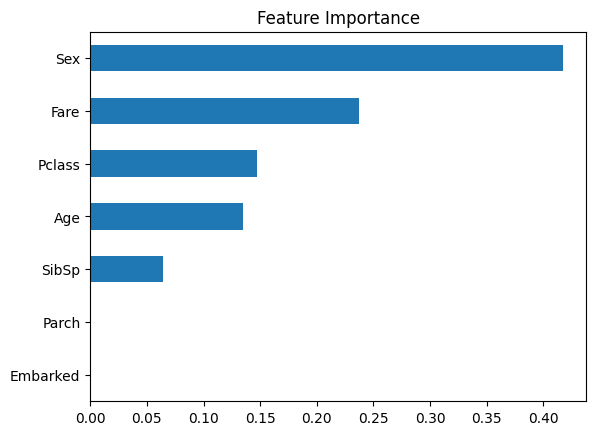

In [18]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


# Test Data

In [20]:
manual_test = [
    [1, 0, 38, 1, 0, 71.28, 0],   # rich female, high chance survive
    [3, 1, 22, 0, 0, 7.25, 2],     # poor young male, low chance
    [2, 0, 26, 0, 0, 12.35, 2],    # middle class female
    [3, 0, 35, 1, 2, 15.50, 1],    # poor female with family
    [1, 1, 54, 0, 0, 51.86, 2],    # rich old male
    [3, 1, 2, 3, 1, 21.07, 2],     # male child with family
    [2, 1, 30, 0, 0, 13.00, 2],    # middle class male
    [1, 0, 18, 0, 0, 80.00, 0],    # young rich female
    [3, 1, 40, 1, 0, 8.05, 2],     # poor adult male
    [2, 0, 45, 0, 0, 26.00, 2]     # middle class female
]


In [21]:
manual_pred = rf.predict(manual_test)

for i, p in enumerate(manual_pred):
    print(f"Passenger {i+1} Prediction:", "Survived" if p==1 else "Not Survived")


Passenger 1 Prediction: Survived
Passenger 2 Prediction: Not Survived
Passenger 3 Prediction: Survived
Passenger 4 Prediction: Survived
Passenger 5 Prediction: Not Survived
Passenger 6 Prediction: Not Survived
Passenger 7 Prediction: Not Survived
Passenger 8 Prediction: Survived
Passenger 9 Prediction: Not Survived
Passenger 10 Prediction: Survived


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
